In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:

df = pd.read_csv("..\\data\\exoplanet_dataset.csv")  


In [3]:
def preprocess_data(df):
    redundant_cols = ['id', 'name']
    df.drop(columns=[col for col in redundant_cols if col in df.columns], inplace=True)
    
    df.dropna(inplace=True)
    
    # Convert all columns to numeric, forcing errors to NaN
    df = df.apply(pd.to_numeric, errors='coerce')
    
    df.dropna(inplace=True)
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df

df = preprocess_data(df)


c:\Users\isatyamks\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\isatyamks\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


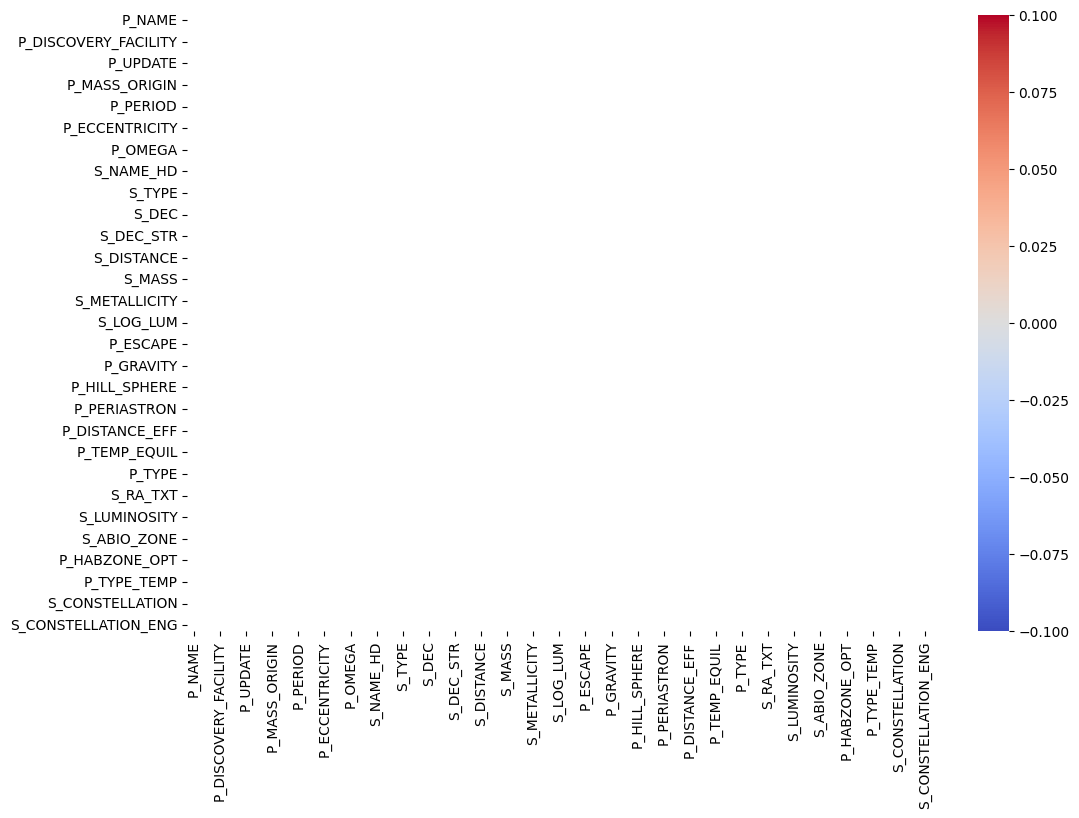

In [4]:
def feature_engineering(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()
    
    relevant_features = ['P_HABITABLE', 'S_TEMPERATURE', 'P_GRAVITY', 'P_DENSITY'] 
    existing_features = [feature for feature in relevant_features if feature in df.columns]
    if not existing_features:
        raise KeyError(f"None of {relevant_features} are in the columns of the dataframe")
    
    df = df[existing_features]
    
    if 'S_TEMPERATURE' in df.columns and 'P_GRAVITY' in df.columns and 'P_DENSITY' in df.columns:
        df['ESI'] = (df['S_TEMPERATURE'] / 288.0) * (df['P_GRAVITY'] / 9.8) * (df['P_DENSITY'] / 1.0)
    
    return df

df = feature_engineering(df)



In [6]:
def categorize_habitability(value):
    if value >= 0.8:
        return 'Potentially Habitable'
    elif 0.5 <= value < 0.8:
        return 'Marginally Habitable'
    else:
        return 'Non-Habitable'

df['Habitability'] = df['P_HABITABLE'].apply(categorize_habitability)

df.drop(columns=['P_HABITABLE'], inplace=True)



In [7]:
X = df.drop(columns=['Habitability'])
y = df['Habitability']



In [9]:
# Ensure the dataframe is populated with data
if df.empty:
	raise ValueError("The dataframe 'df' is empty. Please check the data preprocessing steps.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ValueError: The dataframe 'df' is empty. Please check the data preprocessing steps.

In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
